# Data Cleaning and Preparation

---

During the course of doing data analysis and modeling, a significant amount of time is spent on data preparation: loading, cleaning, transforming, and rearranging. Such tasks often takes 80% or more of an analyst’s time. Sometimes the way that data is stored in files or databases is not in the right format for a particular task. Fortunately, pandas, along with the built-in Python language features, provides you with a high-level, flexible, and fast set of tools to enable you to manipulate data into the right form.



$$
$$

### [Pandas 100 tricks](https://www.kaggle.com/python10pm/pandas-100-tricks)



### Lecture outline

---

* Finding and Filling Missing Values


* Removing Duplicate Values


* Replacing Values


* Discretization and Binning


* Detecting Outliers


* String Manipulations


* Variable Transformation

## Finding and Filling Missing Values

---

Missing values are pretty common in data cleaning activities. And, they can be there for any number of reasons.


For instance, if you are running a survey and a respondent didn't answer a question the missing value is
actually an omission. This kind of missing data is called **Missing at Random** if there are other variables
that might be used to predict the variable which is missing. If there is no relationship to other variables, then  we call this data **Missing Completely at Random (MCAR)**, in other words, missing is independent of the observed and unobserved data. **Missing not at random (MNAR)**. When data are MNAR, the fact that the data are missing is systematically related to the unobserved data, that is, the missingness is related to events or factors which are not measured by the researcher.


Pandas works with missing data as painless as possible. For example, all of the descriptive statistics on pandas objects exclude missing data by default.


> Not only `NaN`, `NA`, `N/A`, `NAT`, `NULL`, and `None` are missing values. There can be other missing values in the data. That's why we need always to know our data

#### Reference

[Types of Missing Data](https://www.ncbi.nlm.nih.gov/books/NBK493614/)


[Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

![alt text](images/missing_data.jpeg "Title")

In [1]:
import pandas as pd

import numpy as np

In [2]:
weather = pd.read_csv("data/weather.csv")

weather.head()

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0,23.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0,51.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0,22.0


### Detecting Missing Values

In [3]:
weather.isnull() # Retruns boolean seris. True denotes missing value


weather.isna() # Same as "isnull()" method

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8780,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8781,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8782,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [4]:
weather.isnull().any() # Shows all columns with missing value

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND     True
PRESSURE           False
HUMIDITY           False
VIEW_RANGE          True
CLOUD               True
MIST                True
RAIN                True
SNOW                True
THUNDER             True
ICE                 True
WEATHER_CODE        True
dtype: bool

In [5]:
weather[weather.isnull().any(axis=1)] # Show all rows with missing values

# Something weird happens in "MIN_TEMP_GROUND" column - We'll see later

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0,23.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0,51.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,20161231,19,35,NaN,10271,98,7.0,9.0,1.0,0.0,0.0,0.0,0.0,34.0
8779,20161231,20,35,NaN,10265,98,11.0,8.0,1.0,0.0,0.0,0.0,0.0,20.0
8780,20161231,21,34,NaN,10258,98,9.0,9.0,1.0,0.0,0.0,0.0,0.0,34.0
8781,20161231,22,30,NaN,10253,98,9.0,9.0,1.0,1.0,0.0,0.0,0.0,33.0


In [6]:
weather.isnull().all(axis=1).any() # Are there any rows with only null values?

False

In [7]:
weather.notnull().all() # Are there any columns with no null values at all?

YYYYMMDD            True
TIME                True
TEMP                True
MIN_TEMP_GROUND    False
PRESSURE            True
HUMIDITY            True
VIEW_RANGE         False
CLOUD              False
MIST               False
RAIN               False
SNOW               False
THUNDER            False
ICE                False
WEATHER_CODE       False
dtype: bool

In [8]:
weather["MIN_TEMP_GROUND"].head(30) # Do you see pattern?

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      3.0
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11   -17.0
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17    47.0
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23    47.0
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29    48.0
Name: MIN_TEMP_GROUND, dtype: float64

In [9]:
every_6th_row_index = pd.Series(range(5, len(weather), 6)) # Indices for every 6th row

every_6th_row_index

0          5
1         11
2         17
3         23
4         29
        ... 
1459    8759
1460    8765
1461    8771
1462    8777
1463    8783
Length: 1464, dtype: int64

In [10]:
weather["MIN_TEMP_GROUND"][every_6th_row_index].notnull().all() # Are all these rows NOT null?

True

In [12]:
weather['MIN_TEMP_GROUND'].drop(every_6th_row_index).isnull().all() # Are all other rows null?

True

### Handling Missing Values

---

The strategy of handling missing values depends on the type of missing value and/or the problem and data at hand. We may have huge amount of data and dropping missing values will not affect our aims, or we may have small amount of data and it's desirable to impute the missing values.

Let see how can we drop/remove missing values in rows and columns.

In [13]:
series = pd.Series([1, np.nan, 3.5, np.nan, 7, 10, np.nan])

series

0     1.0
1     NaN
2     3.5
3     NaN
4     7.0
5    10.0
6     NaN
dtype: float64

In [15]:
series.dropna() # Removes missing values


series[series.notnull()] # Same as above

0     1.0
2     3.5
4     7.0
5    10.0
dtype: float64

Dropping missing values from DataFrame is somewhat different from dropping missing values from Series. For that reason, I create sample DataFrame, to show the effect of `dropna()` method on DataFrame.

In [16]:
missing_df = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                           [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]], columns=["a", "b", "c"])

missing_df

,a,b,c
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [18]:
missing_df.dropna(axis=0, how="any") # The shortest solution - drop everything (Generally not good idea!!!)


missing_df.dropna(axis=0, how="all") # Remove rows if all values are missing

,a,b,c
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [19]:
missing_df.dropna(axis=1, how="any") # Drop column if contains at least one missing value

missing_df.dropna(axis=1, how="all") # Drop column if all values are missing

,a,b,c
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [21]:
missing_df.dropna(axis=0, how="any", subset=["a", "b"]) # Filter out missing values by column

,a,b,c
0,1.0,6.5,3.0


Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. For most purposes, the `fillna()` method is the workhorse function to use.

In [22]:
missing_df

,a,b,c
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [34]:
missing_df.fillna(value=999) # Fill missing values with a constant

missing_df.fillna(missing_df.mean()) # Fill missing values with a mean

missing_df.fillna(missing_df.mode().iloc[0]) # Fill missing values with a mode

missing_df.fillna({"a": 999, "b": -1, "c": 100}) # Fill missing values by different fill value for each column

,a,b,c
0,1.0,6.5,3.0
1,1.0,-1.0,100.0
2,999.0,-1.0,100.0
3,999.0,6.5,3.0


In [35]:
missing_df

,a,b,c
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [37]:
missing_df.fillna(method="ffill") # Forward Fill - use last valid observation for filling

missing_df.fillna(method="backfill") # Forward fill - use next valid observation to fill gap

,a,b,c
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,NaN,6.5,3.0
3,NaN,6.5,3.0


## Removing Duplicate Values

---

We may have duplicate values in our data due to several reasons and they can cause some difficulties during data analysis procedure. We have to identify them and then handle them properly. In other words, we have to find unique identifier for each row.

In [38]:
athletes = pd.read_csv("data/athletes.csv")

athletes.head()

,id,nationality,sex,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [44]:
athletes.duplicated() # Boolean series indicating duplicated rows. Uses all columns to find duplicates

athletes.duplicated(subset=["id", "sex"]) # Uses only two columns for duplicate identification

0        False
1        False
2        False
3        False
4        False
         ...  
11538    False
11539    False
11540    False
11541    False
11542    False
Length: 11543, dtype: bool

In [45]:
athletes[athletes.duplicated()] # Shows which rows are duplicated

,id,nationality,sex,height,weight,sport,gold,silver,bronze
3224,277821751,RUS,female,1.76,67.0,aquatics,0,0,1
3813,96493170,GER,male,1.82,78.0,football,0,1,0
5676,891867859,USA,male,1.88,86.0,athletics,1,0,0
9695,848761398,COL,male,1.70,61.0,cycling,0,0,0
10774,1152723,GRE,female,1.81,70.0,fencing,0,0,0


In [70]:
athletes.drop_duplicates() # Removes all duplicate rows


athletes.drop_duplicates(subset=["id", "nationality"], keep="first") # Remove duplicates only considering some columns

,id,nationality,sex,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...
7099,104377411,SOM,female,NaN,NaN,athletics,0,0,0
7251,386159479,PNG,male,1.75,64.0,taekwondo,0,0,0
7699,984836225,YEM,male,1.69,61.0,athletics,0,0,0
8678,417884111,SWZ,female,1.70,57.0,athletics,0,0,0


## Replacing Values

---

There are situations when we just need to replace values in a Pandas Series or DataFrame. For that reason, we can use `replace()` method

In [71]:
missing_df.head()

,a,b,c
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [74]:
missing_df.replace(to_replace=np.nan, value=999) # Replace all NaN's with 999

missing_df.replace(to_replace=[1.0, 3.0], value=[2.0, 4.0]) # Replace several values

missing_df.replace(to_replace=[1.0, 6.5], value=np.nan) # Replace multiple values at once

,a,b,c
0,NaN,NaN,3.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,3.0


## Discretization and Binning

---

Continuous data is often discretized or otherwise separated into `bins` for analysis. Suppose you have data about a group of people in a study, and you want to group them into discrete buckets.

Let discretize `weight` column.

In [75]:
athletes.head()

,id,nationality,sex,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [76]:
athletes["weight"].describe()

count    10884.000000
mean        72.068357
std         16.174702
min         31.000000
25%         60.000000
50%         70.000000
75%         81.000000
max        170.000000
Name: weight, dtype: float64

Before we discretize weight column, let calculate `BMI - Body Mass Index` and then discretize weight according to that values.

In [77]:
athletes["bmi"] = athletes["weight"] / (athletes["height"] ** 2)

athletes.head()

,id,nationality,sex,height,weight,sport,gold,silver,bronze,bmi
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0,21.633315
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0,19.841270
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1,20.151005
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0,23.888441
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0,21.672110


In [78]:
bins = [0, 18.5, 25, 30, 60]

names = ["underweight", "normal_weight", "overweight", "obese"]

athletes["new_weight"] = pd.cut(athletes["bmi"], bins=bins, labels=names)

In [79]:
athletes.head()

,id,nationality,sex,height,weight,sport,gold,silver,bronze,bmi,new_weight
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0,21.633315,normal_weight
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0,19.841270,normal_weight
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1,20.151005,normal_weight
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0,23.888441,normal_weight
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0,21.672110,normal_weight


In [88]:
athletes[athletes["new_weight"] == "normal_weight"]["height"].describe()

count    8263.000000
mean        1.759486
std         0.108936
min         1.340000
25%         1.680000
50%         1.750000
75%         1.830000
max         2.180000
Name: height, dtype: float64

In [80]:
athletes["new_weight"].value_counts()

normal_weight    8263
overweight       1680
underweight       549
obese             371
Name: new_weight, dtype: int64

If we pass an integer number of bins to cut instead of explicit bin edges, Pandas `cut()` will compute equal-length bins based on the minimum and maximum values in the data.

In [85]:
pd.cut(athletes["bmi"], bins=4)

0        (11.353, 21.896]
1        (11.353, 21.896]
2        (11.353, 21.896]
3        (21.896, 32.397]
4        (11.353, 21.896]
               ...       
11538    (11.353, 21.896]
11539    (11.353, 21.896]
11540    (21.896, 32.397]
11541    (11.353, 21.896]
11542    (11.353, 21.896]
Name: bmi, Length: 11543, dtype: category
Categories (4, interval[float64]): [(11.353, 21.896] < (21.896, 32.397] < (32.397, 42.897] < (42.897, 53.398]]

Considering the distribution of the data, `cut()` method may not return equal-sized bins, while `qcut()` method by definition return approximately equal-size bins as it bins the data based on sample quantiles.

In [86]:
athletes["bmi"].describe()

count    10863.000000
mean        22.869240
std          3.410002
min         11.395179
25%         20.715694
50%         22.417480
75%         24.419279
max         53.398266
Name: bmi, dtype: float64

In [87]:
pd.qcut(athletes["bmi"], q=10) # Deciles

pd.qcut(athletes["bmi"], q=4) # Quartiles

0        (20.716, 22.417]
1        (11.394, 20.716]
2        (11.394, 20.716]
3        (22.417, 24.419]
4        (20.716, 22.417]
               ...       
11538    (20.716, 22.417]
11539    (20.716, 22.417]
11540    (24.419, 53.398]
11541    (20.716, 22.417]
11542    (11.394, 20.716]
Name: bmi, Length: 11543, dtype: category
Categories (4, interval[float64]): [(11.394, 20.716] < (20.716, 22.417] < (22.417, 24.419] < (24.419, 53.398]]

## Detecting Outliers

---

![alt text](images/iqr.png "Title")



The naive approach to detect outliers is to use `InterQuartile Range - IQR`. We can use that approach to check if the `height` column contains some outliers. The formula for `IQR` is the following:

$$
\text{IQR} = Q_{3} - Q_{1}
$$

where, $Q_{3}$ and $Q_{1}$ are upper and lower quartiles, respectively.


From the above picture, we see that $99\%$ of observations should be inside $\{Q_{1} - 1.5 \times \text{IQR}; Q_{3} + 1.5 \times \text{IQR}\}$

In [89]:
athletes.head()

,id,nationality,sex,height,weight,sport,gold,silver,bronze,bmi,new_weight
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0,21.633315,normal_weight
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0,19.841270,normal_weight
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1,20.151005,normal_weight
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0,23.888441,normal_weight
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0,21.672110,normal_weight


In [90]:
q1 = athletes["height"].quantile(.25)

q3 = athletes["height"].quantile(.75)

iqr = q3 - q1

pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr

In [91]:
pmin

1.4649999999999999

In [92]:
pmax

2.0650000000000004

In [93]:
athletes[athletes["height"].between(pmin, pmax)] # Values between IQR range

,id,nationality,sex,height,weight,sport,gold,silver,bronze,bmi,new_weight
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0,21.633315,normal_weight
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0,19.841270,normal_weight
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1,20.151005,normal_weight
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0,23.888441,normal_weight
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0,21.672110,normal_weight
...,...,...,...,...,...,...,...,...,...,...,...
11538,265605954,CUB,female,1.64,58.0,athletics,0,0,0,21.564545,normal_weight
11539,214461847,CZE,female,1.73,63.0,athletics,0,0,0,21.049818,normal_weight
11540,88361042,CHN,male,1.85,100.0,wrestling,0,0,0,29.218408,overweight
11541,900065925,VIE,male,1.60,56.0,weightlifting,0,0,0,21.875000,normal_weight


In [94]:
athletes[(athletes["height"].lt(pmin)) | (athletes["height"].gt(pmax))] # Values outside IQR range

,id,nationality,sex,height,weight,sport,gold,silver,bronze,bmi,new_weight
19,334169879,EGY,male,2.10,88.0,volleyball,0,0,0,19.954649,normal_weight
48,962468808,NIG,male,2.07,98.0,taekwondo,0,1,0,22.871012,normal_weight
210,676958658,JPN,female,1.46,35.0,gymnastics,0,0,0,16.419591,underweight
250,249203070,NGR,male,2.10,102.0,basketball,0,0,0,23.129252,normal_weight
402,120799596,RUS,male,2.10,90.0,volleyball,0,0,0,20.408163,normal_weight
...,...,...,...,...,...,...,...,...,...,...,...
10755,321151857,ITA,female,1.45,45.0,gymnastics,0,0,0,21.403092,normal_weight
10927,54519941,SRB,male,2.11,112.0,basketball,0,1,0,25.156668,overweight
11028,879180304,ESP,male,2.10,115.0,basketball,0,0,1,26.077098,overweight
11129,44353519,CHN,female,1.40,33.0,gymnastics,0,0,1,16.836735,underweight


## String Manipulations

---

Strings represent letters and other symbols surrounded by quotation marks. Pandas has support of string manipulation and the methods are accessible by `.str` attribute. Strings are represented as `object` data type in Pandas, instead of conventional `str`.

#### Reference


[Working with text data](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)

In [95]:
titanic = pd.read_csv("data/titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
titanic["Name"].str.split(".") # Split string on a specified character

0                             [Braund, Mr,  Owen Harris]
1      [Cumings, Mrs,  John Bradley (Florence Briggs ...
2                              [Heikkinen, Miss,  Laina]
3        [Futrelle, Mrs,  Jacques Heath (Lily May Peel)]
4                            [Allen, Mr,  William Henry]
                             ...                        
886                             [Montvila, Rev,  Juozas]
887                      [Graham, Miss,  Margaret Edith]
888          [Johnston, Miss,  Catherine Helen "Carrie"]
889                             [Behr, Mr,  Karl Howell]
890                               [Dooley, Mr,  Patrick]
Name: Name, Length: 891, dtype: object

In [101]:
titanic["Name"].str.split(".", expand=True) # Split string on a specified character and return DataFrame

,0,1,2
0,"Braund, Mr",Owen Harris,None
1,"Cumings, Mrs",John Bradley (Florence Briggs Thayer),None
2,"Heikkinen, Miss",Laina,None
3,"Futrelle, Mrs",Jacques Heath (Lily May Peel),None
4,"Allen, Mr",William Henry,None
...,...,...,...
886,"Montvila, Rev",Juozas,None
887,"Graham, Miss",Margaret Edith,None
888,"Johnston, Miss","Catherine Helen ""Carrie""",None
889,"Behr, Mr",Karl Howell,None


In [108]:
titanic["Name"].str.strip() # Remove leading and trailing spaces

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [109]:
titanic["Name"].str.contains("Mrs") # True if sub-string is included in string

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [111]:
titanic["Name"].str.replace("Mrs", "###") # Replace string with other value

0                                Braund, Mr. Owen Harris
1      Cumings, sdafghkjahdsvfkjDHSVKJAHDSC. John Bra...
2                                 Heikkinen, Miss. Laina
3      Futrelle, sdafghkjahdsvfkjDHSVKJAHDSC. Jacques...
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [115]:
titanic["Name"].str.startswith("Mrs") # True if string starts with "Mrs"

titanic["Name"].str.endswith("a") # True if string ends with "a"

0      False
1      False
2       True
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [117]:
titanic["Name"].str.lower() # Lower case letter


titanic["Name"].str.upper() # Upper case letters

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [118]:
titanic["Name"].str.capitalize()

0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [121]:
titanic["Name"].str.repeat(3)

0      Braund, Mr. Owen HarrisBraund, Mr. Owen Harris...
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2      Heikkinen, Miss. LainaHeikkinen, Miss. LainaHe...
3      Futrelle, Mrs. Jacques Heath (Lily May Peel)Fu...
4      Allen, Mr. William HenryAllen, Mr. William Hen...
                             ...                        
886    Montvila, Rev. JuozasMontvila, Rev. JuozasMont...
887    Graham, Miss. Margaret EdithGraham, Miss. Marg...
888    Johnston, Miss. Catherine Helen "Carrie"Johnst...
889    Behr, Mr. Karl HowellBehr, Mr. Karl HowellBehr...
890    Dooley, Mr. PatrickDooley, Mr. PatrickDooley, ...
Name: Name, Length: 891, dtype: object

## Variable Transformation

---

To do a modeling, at the first stage, one have to take into consideration that we have some fixed set of models and we have to fit the data to our model, and the second is that these models have their assumptions - **which rarely holds in real world**.


When the assumptions do not hold, we apply different transformations to our data, in order to have as desirable data format for the model as possible. By doing so, we try to extract as much information from our data as possible.


> **The type of variable transformation greatly depends on the type of model we plan to use for modeling.**


Transformation methods are classified in two broad class:


* **Numeric Variable Transformation** - is turning a numeric variable to another numeric variable. Typically it is meant to change the scale of values and/or to adjust the skewed data distribution to Gaussian-like distribution through some `monotonic transformation`


* **Categorical Variable Transformation** - is turning a categorical variable to a numeric variable. Categorical variable transformation is mandatory for most of the machine learning models because they can handle only numeric values.

### Numerical Variable Transformations

---


* **Standardization**


* **Min-max scaling**


* **Logarithmic transformation**

In [122]:
athletes.head()

,id,nationality,sex,height,weight,sport,gold,silver,bronze,bmi,new_weight
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0,21.633315,normal_weight
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0,19.841270,normal_weight
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1,20.151005,normal_weight
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0,23.888441,normal_weight
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0,21.672110,normal_weight


Standardization happens using the following formula:

$$
X'_{i} = \frac{X_{i} - \bar{X_{n}}}{s}
$$

where, $\bar{X_{n}}$ is an arithmetic average and $s$ is standard deviation.

In [123]:
(athletes['weight'] - athletes["weight"].mean()) / athletes["weight"].std()

0       -0.498826
1       -0.993425
2        0.428548
3        0.490373
4       -0.066051
           ...   
11538   -0.869775
11539   -0.560651
11540    1.726872
11541   -0.993425
11542   -0.127876
Name: weight, Length: 11543, dtype: float64

Min-Max Scaling happens using the following formula:

$$
X'_{i} = \frac{X_{i} - min(X)}{max(X) - min(X)}
$$

In [124]:
((athletes['weight'] - athletes["weight"].min()) / (athletes["weight"].max() - athletes["weight"].min()))

0        0.237410
1        0.179856
2        0.345324
3        0.352518
4        0.287770
           ...   
11538    0.194245
11539    0.230216
11540    0.496403
11541    0.179856
11542    0.280576
Name: weight, Length: 11543, dtype: float64

In [125]:
((athletes['weight'] - athletes["weight"].min()) / (athletes["weight"].max() - athletes["weight"].min())).describe()

count    10884.000000
mean         0.295456
std          0.116365
min          0.000000
25%          0.208633
50%          0.280576
75%          0.359712
max          1.000000
Name: weight, dtype: float64

Logarithmic transformation happens using by natural logarithm. However, we can use logarithm with any base. Also, note that in order to have successful logarithmic transformation the data should not contain zeros or values less than zeros.

In [126]:
np.log(athletes["weight"]) # Natural logarithm

0        4.158883
1        4.025352
2        4.369448
3        4.382027
4        4.262680
           ...   
11538    4.060443
11539    4.143135
11540    4.605170
11541    4.025352
11542    4.248495
Name: weight, Length: 11543, dtype: float64

<AxesSubplot:ylabel='Frequency'>

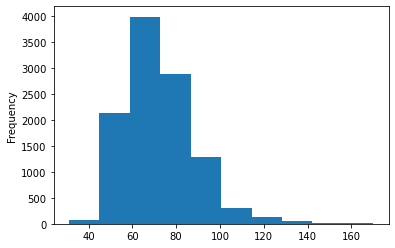

In [128]:
athletes["weight"].plot.hist() # Raw numbers

<AxesSubplot:ylabel='Frequency'>

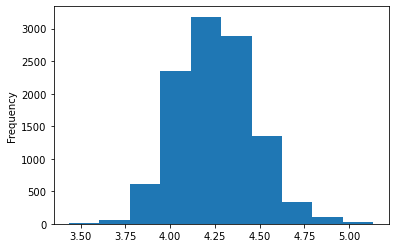

In [127]:
np.log(athletes["weight"]).plot.hist() # Natural logarithm

### Categorical Variable Transformations

---

* **One-hot encoding**

One-hot encoding is also known as dummy variable, meaning that we create indicator or binary variable containing only zeros and ones. Pandas has built in functionality for dummy variable generation. The best candidate for dummy variable is column `sex`.

In [129]:
athletes.head()

,id,nationality,sex,height,weight,sport,gold,silver,bronze,bmi,new_weight
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0,21.633315,normal_weight
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0,19.841270,normal_weight
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1,20.151005,normal_weight
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0,23.888441,normal_weight
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0,21.672110,normal_weight


In [130]:
pd.get_dummies(athletes["sex"]) # Returns dummy variable for any categorical variable

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
11538,1,0
11539,1,0
11540,0,1
11541,0,1


In column `sex` we have two values, `female` and `male`. Have a look at dummy variables above. **They are same**. In the `female` column, 0 denotes male and 1 denotes female, while in `male` column everything is in opposite direction. We conclude that we need to drop one dummy variable, since we have duplicate values.

In [131]:
pd.get_dummies(athletes["sex"], drop_first=True) # Drops one dummy variable

,male
0,1
1,0
2,1
3,1
4,1
...,...
11538,0
11539,0
11540,1
11541,1


This is not an exhaustive list of variable transformations. We will cover them throughout the course.

# Summary

---

In this lecture, we saw how to deal with missing data, duplicate data, and how to do string manipulation, and some other analytical data transformations. In the next lecture, we focus on combining and rearranging datasets in various ways.